#### Mulit fidelity outputs
This notebook generates multi-fidelity output of the homeless care services. We have a fluid flow model, an $M_t/M/h_t$ queueing model and a high fidelity simulation model. 

In [1]:
import queueing_model as qm

In [2]:
import json
import matplotlib.pyplot as plt


In [3]:
# Get data
with open('data_singham23.json') as json_file:
    data = json.load(json_file)

with open('data_as_is_analytical.json') as json_file:
    data_analytical = json.load(json_file)
    

In [4]:
data

{'initial_capacity': {'housing': 4000, 'shelter': 1500},
 'initial_demand': 12000,
 'service_mean': {'housing': 4.487179487179487, 'shelter': 0.0},
 'arrival_rates': [10.01518590998043,
  11.923350293542077,
  13.08718590998043,
  13.08718590998043,
  11.815185909980432,
  10.663185909980431],
 'solution': {'housing': [4000, 5400.0, 7920.0, 10720.0, 14710.0, 18000.0],
  'shelter': [1500, 2500, 3200, 3200, 3200, 3200]}}

In [5]:
analysis_horizon = 5
max_in_system = 20000
data['service_mean']['housing'] = data['service_mean']['housing']*365

# Queueing model
q = qm.queue(data['arrival_rates'],
             data['service_mean'],
             data['initial_capacity'], 
             data['solution'],
             data['initial_demand'], 
             max_in_system)
q.model_dynamics(analysis_horizon,
                 data_analytical['delta_t'])

In [19]:
upc = qm.get_percentiles_single_run(analysis_horizon*365, {'low' : 0.00001, 'high' : 0.99999}, q.p_unsh)

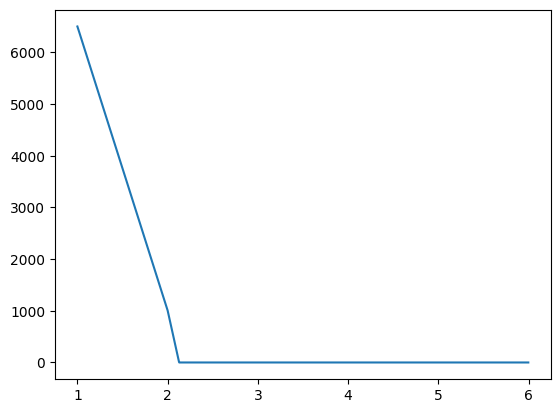

In [20]:
fig, ax = plt.subplots()
x = [(i+365)/365 for i in range(1825)]
ax.plot(x,q.num_unsheltered)
ax.fill_between(x, upc['low'], upc['high'], facecolor = 'palegreen', alpha = 0.3)
plt.show()

In [21]:
upc['high'][365]

1024

In [22]:
upc['low'][365]

991